# Felicidad mundial (2015 - 2019)

# **Índice**   

- [Introduccion](#Introduccion)
- [Tratamiento de datos](#Tratamiento-de-datos)
- [Analisis de datos](#Analisis-de-datos)
  * [Paises del mundo](#Paises-del-mundo)
    + [Felicidad](#Felicidad)
    + [Economia](#Economia)
    + [Familia](#Familia)
    + [Salud](#Salud)
    + [Libertad](#Libertad)
    + [Confianza en el gobierno](#Confianza-en-el-gobierno)
    + [Generosidad](#Generosidad)
    + [Paises en cabeza](#Paises-en-cabeza)
  * [Continentes y regiones](#Continentes-y-regiones)
    + [Regiones](#Regiones)
    + [Continentes](#Continentes)
  * [Correlaciones](#Correlaciones)
  * [España](#España)
- [Conclusiones](#Conclusiones)
- [Autor](#Autor)
    
    

    


### Introduccion

Todo el mundo busca la felicidad, pero, ¿en qué país se encuentra realmente?.

Durante este estudio, vamos a analizar cada uno de los factores que pueden afectar a la felicidad de las personas que habitan en un país, midiendola en una escala del 0 al 10.
Se han tenido en cuenta los siguientes factores:

- Economía del país (PIB).
- Relaciones familiares y sociales.
- Esperanza de vida.
- Libertad en la toma de decisiones.
- Confianza en su gobierno.
- Generosidad de las personas.

Para realizar este estudio hemos obtenido datos desde el año 2015 al 2019 de la siguiente fuente:

https://www.kaggle.com/unsdsn/world-happiness

Los datos se basan en una en encuesta historica sobre el estado de la felicidad mundial, recogiendo datos de los aspectos citados anteriormente.

Durante el estudio trataremos de dar respuesta a preguntas que llevan toda la vida rondando nuestras cabezas, como por ejemplo:

> - ¿El dinero da la felicidad?
> - ¿Son más felices en los paises más desarrollados?
> - ¿Influye el gobierno en la felicidad de las personas?
> - ¿Tienen algo en común la salud y la economia?
> - ¿Como repercute la felicidad en la generosidad de las personas?
> - ¿Cuál ha sido el país más feliz de los último años?

Empezaremos con un tratamiento de los datos obtenidos, adecuandolos a nuestros intereses, para a continuación, realizar un análisis de los mismos, tanto a nivel mundial, nivel continental y nivel nacional.

# Tratamiento de datos

Después de obtener nuestras datos, vemos disparidad en las columnas entre los diferentes datasets, por ello, vamos a normalizarlos, quedandonos solamente con las columnas que vamos a tratar y llamando a las diferentes columnas de la misma forma para luego poder unificarlo.

In [38]:
! python3 -m pip install -r requeriments.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from math import pi
import os

In [40]:
root_path = os.path.join(os.getcwd(), "data")

df15 = pd.read_csv(os.path.join(root_path, "2015.csv"), engine='python', na_values='-1')
df16 = pd.read_csv(os.path.join(root_path, "2016.csv"), engine='python', na_values='-1')
df17 = pd.read_csv(os.path.join(root_path, "2017.csv"), engine='python', na_values='-1')
df18 = pd.read_csv(os.path.join(root_path, "2018.csv"), engine='python', na_values='-1')
df19 = pd.read_csv(os.path.join(root_path, "2019.csv"), engine='python', na_values='-1')


display(df15.sample(3))
display(df16.sample(3))
display(df17.sample(3))
display(df18.sample(3))
display(df19.sample(3))


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
88,Latvia,Central and Eastern Europe,89,5.098,0.04640,1.11312,1.09562,0.72437,0.29671,0.06332,0.18226,1.62215
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
69,Turkmenistan,Central and Eastern Europe,70,5.548,0.04175,0.95847,1.22668,0.53886,0.47610,0.30844,0.16979,1.86984


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
112,Namibia,Sub-Saharan Africa,113,4.574,4.374,4.774,0.93287,0.70362,0.34745,0.48614,0.10398,0.07795,1.92198
11,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343
108,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
78,China,79,5.273,5.319278,5.226721,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
72,Serbia,73,5.395,5.491570,5.298430,1.069318,1.258190,0.650785,0.208716,0.220126,0.040904,1.947084


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
56,57,South Korea,5.875,1.266,1.204,0.955,0.244,0.175,0.051
36,37,Colombia,6.260,0.960,1.439,0.635,0.531,0.099,0.039
62,63,Estonia,5.739,1.200,1.532,0.737,0.553,0.086,0.174


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
113,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102
116,117,Iran,4.548,1.100,0.842,0.785,0.305,0.270,0.125
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076


In [41]:
df15.columns = ['Country','Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy', 'Family', 'Health',
       'Freedom', 'Government Trust', 'Generosity',
       'Dystopia Residual']
df15['Year'] = 2015
del df15['Standard Error']
del df15['Dystopia Residual']

df16.columns = ['Country','Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy', 'Family', 'Health',
       'Freedom', 'Government Trust', 'Generosity',
       'Dystopia Residual']
df16['Year'] = 2016
del df16['Region']
del df16['Lower Confidence Interval']
del df16['Upper Confidence Interval']
del df16['Dystopia Residual']

df17.columns = ['Country','Happiness Rank', 'Happiness Score', 'Whisker High', 'Whisker Low',
       'Economy', 'Family', 'Health',
       'Freedom', 'Generosity', 'Government Trust',
       'Dystopia Residual 2017']
df17['Year'] = 2017
del df17['Whisker High']
del df17['Whisker Low']
del df17['Dystopia Residual 2017']


df18.columns = ['Happiness Rank','Country', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity',
       'Government Trust']
df18['Year'] = 2018

df19.columns = ['Happiness Rank','Country', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity',
       'Government Trust']
df19['Year'] = 2019

df_all = pd.concat([df15,df16,df17,df18,df19], ignore_index=True)
df_all.sort_values(by = ['Country', 'Year'],ignore_index = True, inplace = True)
del df_all['Region']
df_all.fillna(-1)

df_all.to_csv(os.path.join(root_path, "happiness1519.csv"), sep=',', index=False)

display(df_all)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity,Year
0,Afghanistan,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,Afghanistan,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,Afghanistan,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,Afghanistan,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,Afghanistan,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
...,...,...,...,...,...,...,...,...,...,...
777,Zimbabwe,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2015
778,Zimbabwe,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2016
779,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,2017
780,Zimbabwe,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,2018


# Analisis de datos

## Paises del mundo

Una vez obtenido nuestro dataframe diferenciado por paises y años vamos a pasar a nuestro analisis de datos, vamos a comenzar por estudiar la situación de cada país a lo largo de los años a traves de un mapa interactivo en el que podemos ver la evolución, y si nos situamos encima de un país nos devuelve el nombre del mismo y el valor correpondiente a dicho factor y año.

### Felicidad

En el siguiente mapa vamos a poder observar una clara tendencia positiva de la felicidad en los paises más desarrollados como lo son Estados Unidos, Canadá, Australia y los paises del norte de Europa, en cambio, observamos como la parte más oscura del mapa se centra en el África Subsahariana.

Esta es una tendencia que se mantiene a lo largo de los últimos 5 años.

In [42]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Happiness Score", hover_name="Country", 
                    range_color=[df_all['Happiness Score'].min(), df_all['Happiness Score'].max()], 
                    color_continuous_scale="viridis",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de la felicidad en el mundo de 2015 a 2019.')
fig.show()

### Economia

En el caso de la economía volvemos a ver que los paises con mejor condiciones son los paises norteamericos, gran parte de Europa, Australia y empieza a destacar algo Rusia.

A lo largo de los años, podemos observar que la mayor variación la sufren los paises del sur de America Latina.

In [43]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Economy", hover_name="Country", 
                    range_color=[0, 1.5], 
                    color_continuous_scale="oxy",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de la economia de 2015 a 2019.')
fig.show()

### Familia

En este caso, observamos un reparto más igualitario a lo largo del mundo, y es que la calidad de las relaciones sociales y familiares parece ser que no está ligado al lugar del mundo donde vives.

Lo que si observamos es que en los dos últimos años hay cierta tendencia positiva en todo el mundo.

In [44]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Family", hover_name="Country", 
                    range_color=[df_all['Family'].min(), df_all['Family'].max()], 
                    color_continuous_scale="temps",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de las relaciones familiares de 2015 a 2019.')
fig.show()

### Salud

Podemos observar como Canadá, Australia y gran parte de Europa se situan en cabeza, y los paises subdesarrollados son los que, lamentablemente, se situán en la zona baja de nuestra escala. 

In [45]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Health", hover_name="Country", 
                    range_color=[df_all['Health'].min(), df_all['Health'].max()], 
                    color_continuous_scale="rdylgn",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de la salud de 2015 a 2019.')
fig.show()

### Libertad

En este caso podemos ver reflejado cómo hasta paises de los considerados como primer mundo se encuentra con una tendencia negativa, como puede ser Italia o Rusia.

Algo que podemos observar claramente es el caso de Venezuela, que con el paso de los años y los problemas acontecidos en el país, la libertad que sienten sus ciudadanos es cada vez menor, y es algo que está muy relacionado con el siguiente apartado, el gobierno en su país.

In [46]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Freedom", hover_name="Country", 
                    range_color=[df_all['Freedom'].min(), df_all['Freedom'].max()], 
                    color_continuous_scale="earth",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de la libertad de 2015 a 2019.')
fig.show()

### Confianza en el gobierno

Ningún país parece estar del todo contento con su gobierno, y es que solo podemos ver algo de luz en los paises del norte de Europa.

También observamos como todo el mapa se va haciendo cada vez más oscuro con el paso de los años.

In [47]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Government Trust", hover_name="Country", 
                    range_color=[df_all['Government Trust'].min(), df_all['Government Trust'].max()], 
                    color_continuous_scale="thermal",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de la confianza en el gobierno de 2015 a 2019.')
fig.show()

### Generosidad

Destacamos sobre todo la tendencía positiva de los paises del sudeste asiatico, y la aparición de Rusia en la parte baja de la escala.
En este caso, tambien observamos como es un poco independiente del lugar del mundo donde te encuentres, ya que se encuentra mayormente repartido.

In [48]:
fig = px.choropleth(df_all,locationmode = "country names", 
                    locations='Country', animation_frame="Year", 
                    color="Generosity", hover_name="Country", 
                    range_color=[df_all['Generosity'].min(), df_all['Generosity'].max()], 
                    color_continuous_scale="pinkyl",
                    projection = 'kavrayskiy7',
                    title = 'Evolución de la generosidad de 2015 a 2019.')
fig.show()

### Paises en cabeza

Nos ha parecido interesante hacer un seguimiento de cual ha sido el país más feliz en los últimos años para responder a una de las preguntas iniciales, y es que ese privilegio se lo han ido repartiendo varios paises del norte de Europa, siguiendole como país extranjero más cercano, Canadá, que solo ha logrado estar en 5ª posición.

Podemos observar como Finlandia repite en 2019 como país más feliz del mundo, despues dar un gran salto del año 2017 al 2018.

Destacamos la caída que han ido sufriendo Canadá y Suiza en el ranking.

Por último en este apartado, hemos reducido nuestro dataset a una media de los último 5 años, para de esa forma sacar un ranking global más genérico.

Hemos querido representar los diferentes factores de los 4 paises que se situan en cabeza.

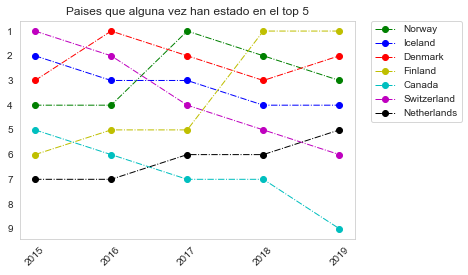

In [49]:
country_top = list(set(df_all[df_all['Happiness Rank'] <= 5]['Country']))

style = ['go-.','bo-.','ro-.','yo-.','co-.','mo-.','ko-.']

fig,axis = plt.subplots(1,1)

for n in range(len(country_top)):
      axis.plot(df_all[df_all['Country'] == country_top[n]]['Year'],df_all[df_all['Country'] == country_top[n]]['Happiness Rank'],style[n],label=country_top[n],linewidth=1)
      
axis.set_title("Paises que alguna vez han estado en el top 5")
axis.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axis.invert_yaxis()
axis.xaxis.set_ticks(np.arange(2015, 2020, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [50]:
df_all_mean = df_all.groupby('Country').mean().loc[:, 'Happiness Score':'Generosity']
df_all_mean['Country'] = df_all_mean.index
df_all_mean.sort_values(by = 'Happiness Score', ascending = False, inplace = True, ignore_index = True)

display(df_all_mean)

,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity,Country
0,7.54600,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,Denmark
1,7.54100,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,Norway
2,7.53780,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,Finland
3,7.51140,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,Switzerland
4,7.51100,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,Iceland
...,...,...,...,...,...,...,...,...
165,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311,Rwanda
166,3.38250,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665,South Sudan
167,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,Syria
168,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,Central African Republic


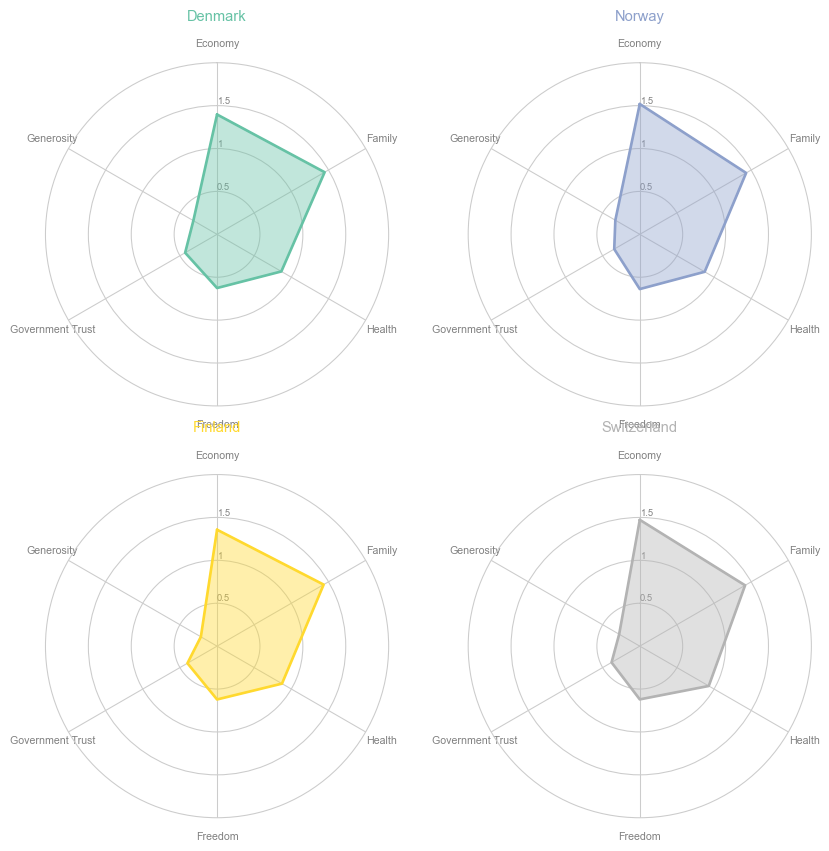

In [51]:
def make_spider(row, title, color):
 
    categories=list(df_all_mean.iloc[0:4,1:])[:-1]
    N = len(categories)
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2,2,row+1, polar=True, )

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([0.5,1,1.5], ["0.5","1","1.5"], color="grey", size=7)
    plt.ylim(0,2)

    values=df_all_mean.iloc[0:4,1:].loc[row].drop('Country').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=11, color=color, y=1.1)
    
    return 0

my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.cm.get_cmap("Set2", len(df_all_mean.iloc[0:4,1:].index))

for row in range(0, len(df_all_mean.iloc[0:4,1:].index)):
    make_spider( row=row, title=df_all_mean.iloc[0:4,1:]['Country'][row], color=my_palette(row))

## Continentes y regiones

Un vez terminado con el estudio por paises, vamos a pasar a un estudio por continentes. Para este caso hemos querido diferenciar America en dos subcontinentes, America del Sur y America del Norte, debido a la gran diferencia existente entre ámbos.

Primero haremos un breve estudio diferenciando el mundo en regiones.

In [52]:
#Introducimos continentes de los paises en el dataframe
df15.drop(['Happiness Rank', 'Happiness Score', 'Economy', 'Family', 
            'Health', 'Freedom', 'Government Trust', 'Generosity', 'Year'], 
            axis = 1, inplace = True)

df_all_mean = df_all_mean.merge(df15, on = 'Country', how = 'left')

display(df_all_mean[df_all_mean['Region'].isna()])
print(df_all_mean['Region'].unique())

,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity,Country,Region
13,7.03900,1.359430,1.081130,0.777580,0.468230,0.122750,0.222020,Puerto Rico,NaN
32,6.42200,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,Taiwan Province of China,NaN
41,6.19200,1.227000,1.484500,0.638500,0.532000,0.017500,0.178000,Trinidad & Tobago,NaN
52,5.95600,0.863712,0.956323,0.459961,0.550940,0.097764,0.219952,Belize,NaN
61,5.77650,1.246000,1.231500,0.975500,0.456000,0.158000,0.185000,Northern Cyprus,NaN
78,5.47200,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,"Hong Kong S.A.R., China",NaN
88,5.27400,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,North Macedonia,NaN
105,5.06025,0.005661,0.616820,0.152912,0.600727,0.286553,0.261220,Somalia,NaN
106,5.05700,0.255580,0.758620,0.331080,0.391300,0.367940,0.514790,Somaliland Region,NaN
122,4.55700,0.912576,1.099023,0.382015,0.481611,0.079282,0.069021,Namibia,NaN


['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean' nan
 'Central and Eastern Europe' 'Southeastern Asia' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [53]:
#Asignamos manualmente las regiones restantes

df_all_mean.loc[[13],['Region']] = 'Latin America and Caribbean'
df_all_mean.loc[[32],['Region']] = 'Eastern Asia'
df_all_mean.loc[[41],['Region']] = 'Latin America and Caribbean'
df_all_mean.loc[[52],['Region']] = 'Latin America and Caribbean'
df_all_mean.loc[[61],['Region']] = 'Western Europe'
df_all_mean.loc[[78],['Region']] = 'Eastern Asia'
df_all_mean.loc[[88],['Region']] = 'Central and Eastern Europe'
df_all_mean.loc[[105],['Region']] = 'Sub-Saharan Africa'
df_all_mean.loc[[106],['Region']] = 'Sub-Saharan Africa'
df_all_mean.loc[[122],['Region']] = 'Sub-Saharan Africa'
df_all_mean.loc[[126],['Region']] = 'Sub-Saharan Africa'
df_all_mean.loc[[166],['Region']] = 'Sub-Saharan Africa'

### Regiones

En la siguiente tabla podemos observar lo que ya veniamos viendo en los mapas del principio, pero con la media de los últimos 5 años.
Y es que la región de Australia y Nueva Zelanda se situa en cabeza practicamente en todos los ámbitos, excepto en en el aspecto económico, donde Norte America se sitúa en cabeza.

Como destacabamos en los mapas, prima la generosidad en los paises del sudeste asiatico, y en los paises del este y del centro de Europa, vemos como la libertad, la confianza en el gobierno y la generosidad están muy por debajo del resto de factores de su región.

In [54]:
df_region_mean = df_all_mean.groupby('Region').mean().sort_values(by = 'Happiness Score', ascending = False)
display(df_region_mean.style.bar(subset=['Happiness Score','Economy', 'Family', 'Freedom', 'Generosity', 'Health','Government Trust'], color='#DAF7A6'))

<ipython-input-54-3a2b2a1b16f0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity
Region,,,,,,,
Australia and New Zealand,7.294600,1.356197,1.424368,0.903074,0.611413,0.357294,0.424441
North America,7.174700,1.422037,1.357991,0.861086,0.558918,0.223345,0.372339
Western Europe,6.696444,1.365417,1.328263,0.895952,0.513173,0.219540,0.267887
Latin America and Caribbean,6.067440,0.968865,1.179549,0.670188,0.470649,0.091326,0.188686
Eastern Asia,5.724050,1.296558,1.222683,0.867913,0.420951,0.134197,0.226893
Central and Eastern Europe,5.421667,1.017354,1.174848,0.700193,0.351910,0.074457,0.158176
Middle East and Northern Africa,5.397840,1.112932,0.997000,0.669453,0.360042,0.153566,0.179757
Southeastern Asia,5.323172,0.888794,1.087989,0.632019,0.544366,0.137585,0.383150
Southern Asia,4.580657,0.638813,0.803835,0.513089,0.392867,0.100357,0.300888


### Continentes

Hemos agrupado los diferentes regiones en sus respectivos continentes y vemos como África y Oceania se situan en ambos extremos, negativo y positivo, respectivamente.

<ipython-input-55-b411d529f0a3>:20: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity
Continent,,,,,,,
Africa,4.589292,0.646340,0.890789,0.403773,0.356344,0.130840,0.205563
Asia,5.240231,0.951804,1.050009,0.675963,0.459040,0.125598,0.307071
Europe,5.960996,1.164612,1.239754,0.783014,0.420137,0.135839,0.204592
North America,7.174700,1.422037,1.357991,0.861086,0.558918,0.223345,0.372339
Oceania,7.294600,1.356197,1.424368,0.903074,0.611413,0.357294,0.424441
South America,6.067440,0.968865,1.179549,0.670188,0.470649,0.091326,0.188686


<ipython-input-55-b411d529f0a3>:25: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



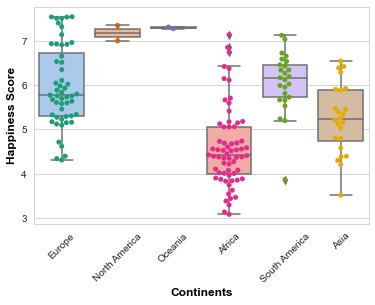

In [55]:
def search_continent(region):
    
    if 'Australia' in region:
        return 'Oceania'
    elif 'North America' in region:
        return 'North America'
    elif 'Latin America' in region:
        return 'South America'
    elif 'Europe' in region:
        return 'Europe'
    elif 'Asia' in region:
        return 'Asia'
    elif 'Africa' in region:
        return 'Africa'
    else:
        return 0

df_all_mean['Continent'] = df_all_mean['Region'].apply(search_continent)

df_continent_mean = df_all_mean.groupby('Continent').mean()

display(df_continent_mean.style.background_gradient(cmap='Blues'))

sns.set_style("whitegrid")
ax = sns.swarmplot(x='Continent', y="Happiness Score", data=df_all_mean, palette = 'Dark2')
ax = sns.boxplot(x='Continent', y="Happiness Score", data=df_all_mean, palette = 'pastel')

plt.xticks(rotation=45)
plt.xlabel('Continents', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Happiness Score', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.show()

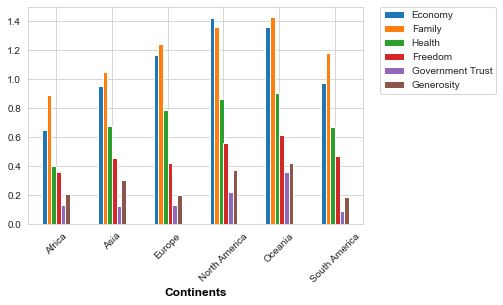

In [56]:
axis = df_continent_mean.loc[:,'Economy':'Generosity'].plot(kind = 'bar')
axis.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Continents', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.xticks(rotation=45)
plt.show()

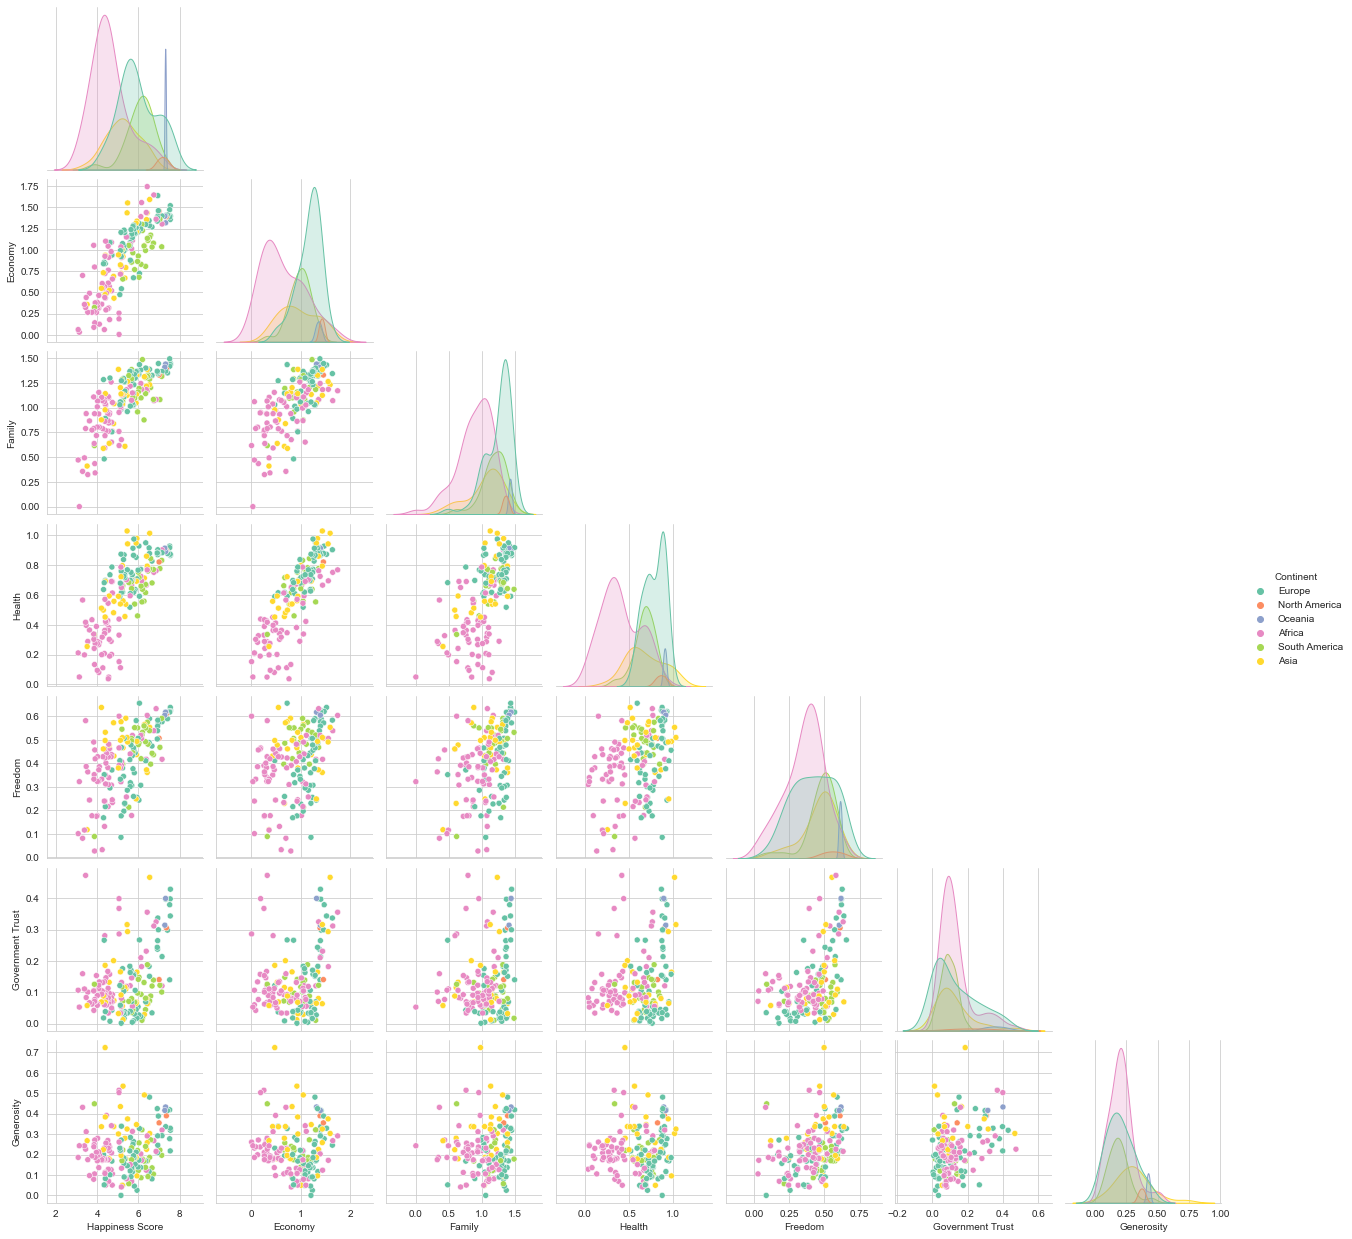

In [57]:
sns.pairplot(df_all_mean, hue = 'Continent', corner = 'True', palette = 'Set2')
plt.show()

## Correlaciones

Efectivamente, como podemos observar a continuación, el dinero da la felicidad (según estos datos). Y es que, resulta que como podiamos venir observando, los paises más ricos y desarrollados, se encuentran entre los paises más felices del mundo. Siendo la salud otro factor a tener en cuenta para la felicidad.

Destacamos tambien, la gran relación que guardan Economía - Salud, y que Felicidad - Generosidad no guardan relación ninguna.

In [58]:
df_corr = df_all_mean.corr()
np.fill_diagonal(df_corr.values, 0)
display(df_corr.style.background_gradient(cmap=plt.get_cmap('BrBG'), axis=1))


<ipython-input-58-278c83d89faa>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity
Happiness Score,0.000000,0.803430,0.755670,0.772317,0.589062,0.377002,0.141704
Economy,0.803430,0.000000,0.701942,0.837582,0.371443,0.251377,-0.046236
Family,0.755670,0.701942,0.000000,0.637808,0.424541,0.149650,0.026805
Health,0.772317,0.837582,0.637808,0.000000,0.369615,0.243655,0.046698
Freedom,0.589062,0.371443,0.424541,0.369615,0.000000,0.476925,0.328088
Government Trust,0.377002,0.251377,0.149650,0.243655,0.476925,0.000000,0.364565
Generosity,0.141704,-0.046236,0.026805,0.046698,0.328088,0.364565,0.000000


<ipython-input-59-f5cad2795290>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-59-f5cad2795290>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-59-f5cad2795290>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-59-f5cad2795290>:6: FutureWarning:

The default value of numeric_only i

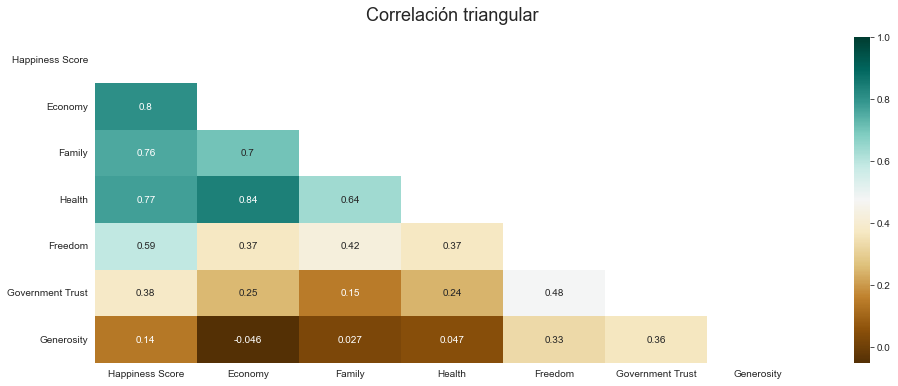

In [59]:
np.triu(np.ones_like(df_all_mean.corr()))

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df_all_mean.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_all_mean.corr(), mask=mask, vmin=-0.05, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación triangular', fontdict={'fontsize':18}, pad=16);
plt.show()


<ipython-input-60-1590197b1420>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-60-1590197b1420>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



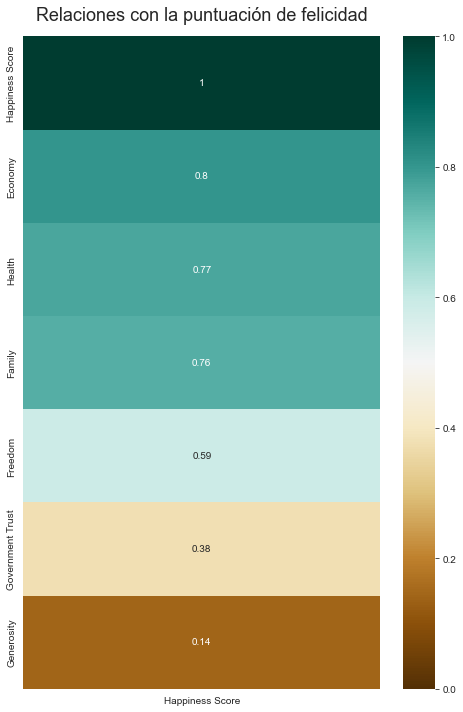

In [60]:
df_all_mean.corr()[['Happiness Score']].sort_values(by='Happiness Score', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_all_mean.corr()[['Happiness Score']].sort_values(by='Happiness Score', ascending=False), 
                      vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Relaciones con la puntuación de felicidad', fontdict={'fontsize':18}, pad=16);
plt.show()

## España

Antes de acabar, vamos a hablar de nuestro país y de la evolución que hemos tenido en los últimos años, y es que parece ser que 2017 fue un buen año para los españoles, no es casualidad que ese año felicidad y economia tengan los valores más altos respecto a los demás años.

Podemos destacar el valor tan bajo en salud y en familia en el 2016 y su recuperación hasta 2019.

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Government Trust,Generosity
Year,,,,,,,,
2015,36,6.329000,1.230110,1.313790,0.955620,0.459510,0.063980,0.182270
2016,37,6.361000,1.342530,1.129450,0.878960,0.375450,0.061370,0.176650
2017,34,6.403000,1.384398,1.532091,0.888961,0.408781,0.070914,0.190134
2018,36,6.310000,1.251000,1.538000,0.965000,0.449000,0.074000,0.142000
2019,30,6.354000,1.286000,1.484000,1.062000,0.362000,0.079000,0.153000


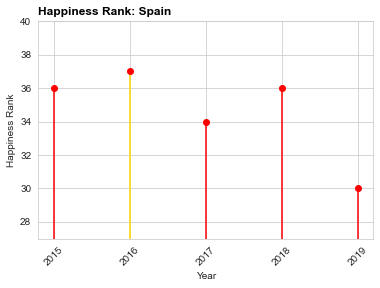

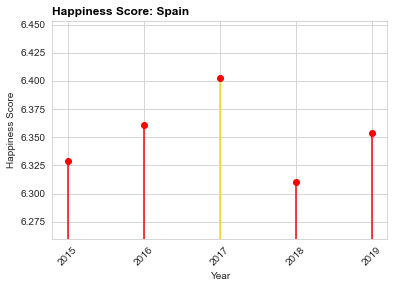

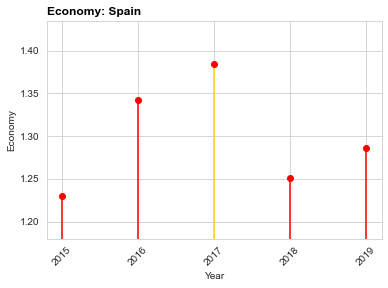

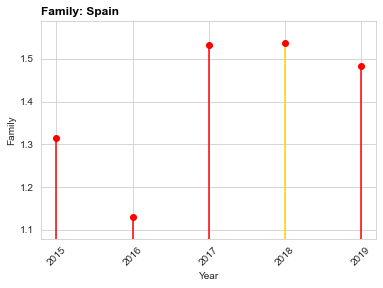

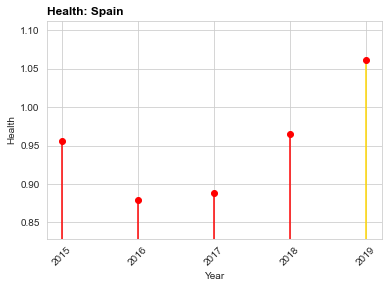

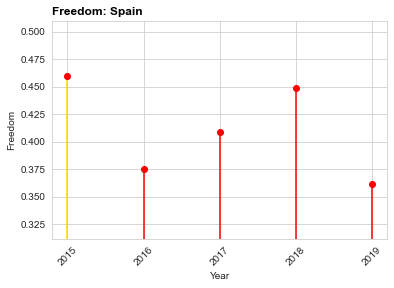

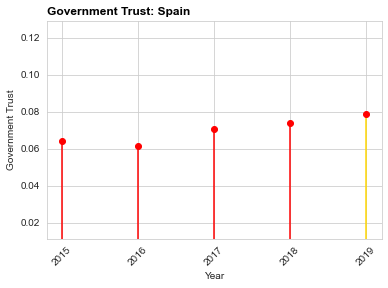

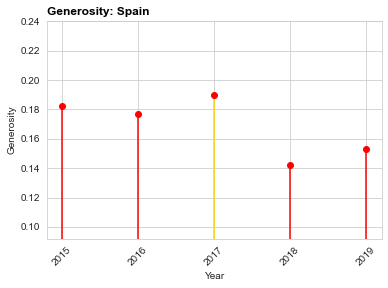

In [61]:
def plot_spain(column):
    
    offset = 3 if (column == 'Happiness Rank') else 0.05
    
    (markers, stemlines, baseline) = plt.stem(df_spain.index, df_spain[column])
    plt.ylim(df_spain[column].min()-offset, df_spain[column].max()+offset)
    plt.xticks(np.arange(min(df_spain.index), max(df_spain.index)+1, 1.0))
    plt.xticks(rotation=45)

    my_color=np.where(df_spain[column] == df_spain[column].max(), 'gold', 'red')
    plt.setp(stemlines, linestyle="-", color=my_color, linewidth=1.5)
    plt.setp(markers, markeredgecolor='red', color = 'red')

    plt.title(str(column) +': Spain', loc='left', fontweight='bold', color = 'black', fontsize='12')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.show()
    
df_spain = df_all[df_all['Country'] == 'Spain'].drop('Country', axis = 1).set_index('Year')
display(df_spain.style.background_gradient(cmap='YlOrRd'))

for c in list(df_spain.columns):  
    plot_spain(c)

# Conclusiones

En mi opinión, la felicidad no es algo que podamos medir en tablas y en gráficas, y menos ajustarla a 7 factores, y es que la felicidad engloba mucho más.

Este estudio nos ha servido para tener una visión global de lo que ya sabiamos de antemano, y es que en los paises ricos se vive mejor, y desgraciadamente, en los subdesarrollados, peor.
Pero no por ello tienen que ser menos felices.

Otro dato que hemos podido observar destacable es el hecho de que la salud es proporcional a la economia, y eso es algo en lo que se deberia trabajar para que la salud sea independiente al nivel adquisitivo de cada persona en todo el mundo.

# Autor

## Adrián Rodriguez Galisteo

Github: https://github.com/adrirg9412/ 

LinkedIn: https://www.linkedin.com/in/adrian-rodriguez-galisteo/